Healthcare Data:
   Patient_ID Doctor_ID     Hospital      Diagnosis Prescription     Timestamp
0       P001      D001   Hospital 1       Covid-19   Medicine A  1.723229e+09
1       P002      D002   Hospital 2            Flu   Medicine D  1.723229e+09
2       P003      D003   Hospital 3       Diabetes   Medicine D  1.723229e+09
3       P004      D004   Hospital 4       Diabetes   Medicine D  1.723229e+09
4       P005      D005   Hospital 5  Heart Disease   Medicine C  1.723229e+09
5       P006      D006   Hospital 6       Diabetes   Medicine D  1.723229e+09
6       P007      D007   Hospital 7  Heart Disease   Medicine A  1.723229e+09
7       P008      D008   Hospital 8  Heart Disease   Medicine B  1.723229e+09
8       P009      D009   Hospital 9         Cancer   Medicine A  1.723229e+09
9       P010      D010  Hospital 10  Heart Disease   Medicine C  1.723229e+09
Block 1 added: Block(index=1, previous_hash=4295745de53ec8185c49bb77155b5fffb5e2d7503d50dd864ebdbffe58292b8b, timestamp=1723

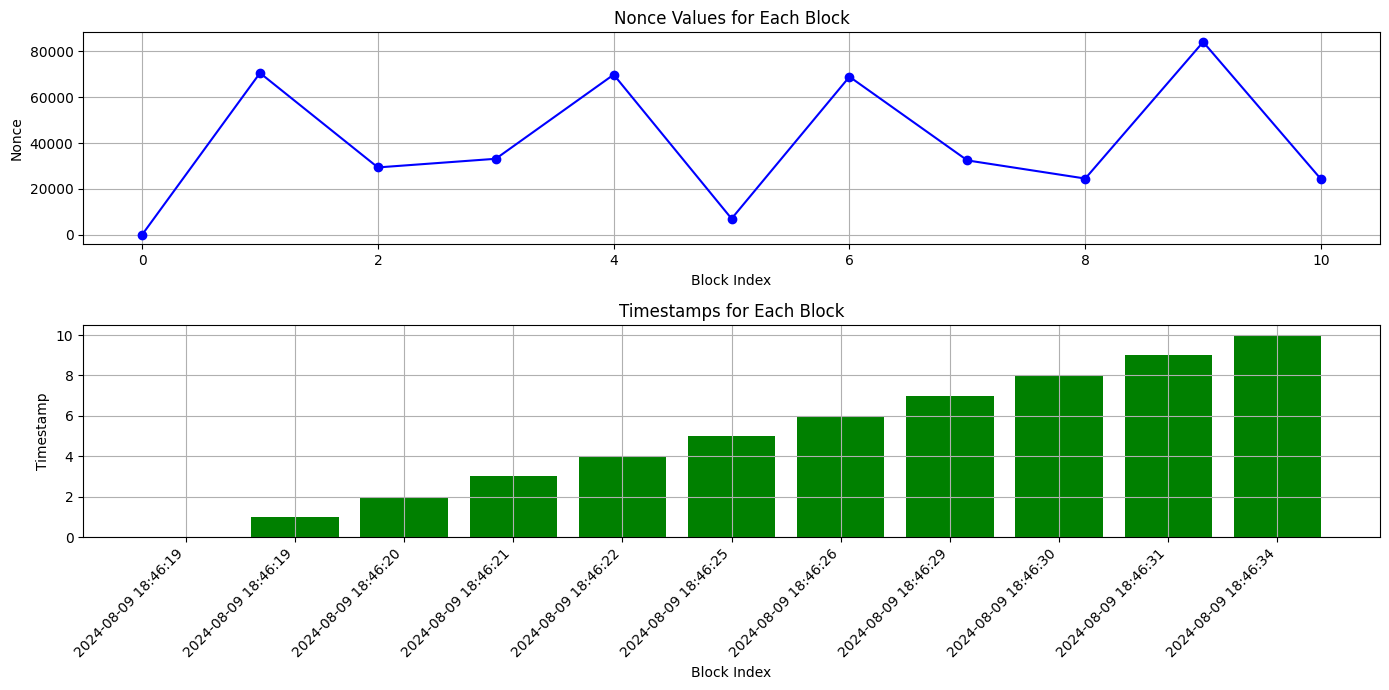

In [1]:
import hashlib
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = str(self.index) + str(self.previous_hash) + str(self.timestamp) + str(self.data) + str(self.nonce)
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def __str__(self):
        return f"Block(index={self.index}, previous_hash={self.previous_hash}, timestamp={self.timestamp}, data={self.data}, nonce={self.nonce}, hash={self.hash})"

class Blockchain:
    def __init__(self, difficulty=4):
        self.chain = [self.create_genesis_block()]
        self.difficulty = difficulty

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.hash = self.proof_of_work(new_block)
        self.chain.append(new_block)

    def proof_of_work(self, block):
        while block.hash[:self.difficulty] != "0" * self.difficulty:
            block.nonce += 1
            block.hash = block.calculate_hash()
        return block.hash

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i-1]

            if current_block.hash != current_block.calculate_hash():
                return False

            if current_block.previous_hash != previous_block.hash:
                return False

        return True

# Simulating the dataset of patient and doctor data
def generate_healthcare_dataset():
    data = {
        "Patient_ID": [f"P{i:03}" for i in range(1, 11)],
        "Doctor_ID": [f"D{i:03}" for i in range(1, 11)],
        "Hospital": [f"Hospital {i}" for i in range(1, 11)],
        "Diagnosis": [random.choice(["Diabetes", "Flu", "Heart Disease", "Covid-19", "Cancer"]) for _ in range(10)],
        "Prescription": [random.choice(["Medicine A", "Medicine B", "Medicine C", "Medicine D", "Medicine E"]) for _ in range(10)],
        "Timestamp": [time.time() + i for i in range(10)]
    }
    return pd.DataFrame(data)

# Plotting function to visualize the blockchain data
def plot_blockchain(blockchain):
    block_indices = []
    block_nonces = []
    block_timestamps = []

    for block in blockchain.chain:
        block_indices.append(block.index)
        block_nonces.append(block.nonce)
        block_timestamps.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(block.timestamp)))

    plt.figure(figsize=(14, 7))

    # Plot Nonces
    plt.subplot(2, 1, 1)
    plt.plot(block_indices, block_nonces, marker='o', linestyle='-', color='b')
    plt.title('Nonce Values for Each Block')
    plt.xlabel('Block Index')
    plt.ylabel('Nonce')
    plt.grid(True)

    # Plot Timestamps
    plt.subplot(2, 1, 2)
    plt.bar(block_indices, range(len(block_indices)), tick_label=block_timestamps, color='g')
    plt.xticks(rotation=45, ha='right')
    plt.title('Timestamps for Each Block')
    plt.xlabel('Block Index')
    plt.ylabel('Timestamp')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example of Healthcare Nodes Processing Data
def main():
    blockchain = Blockchain(difficulty=4)

    # Simulating data generation from 10 healthcare nodes
    healthcare_data = generate_healthcare_dataset()
    print("Healthcare Data:\n", healthcare_data)

    # Processing each row as a block in the blockchain
    for index, row in healthcare_data.iterrows():
        data = {
            "Patient_ID": row["Patient_ID"],
            "Doctor_ID": row["Doctor_ID"],
            "Hospital": row["Hospital"],
            "Diagnosis": row["Diagnosis"],
            "Prescription": row["Prescription"],
            "Timestamp": row["Timestamp"]
        }
        new_block = Block(index + 1, blockchain.get_latest_block().hash, time.time(), data)
        blockchain.add_block(new_block)
        print(f"Block {new_block.index} added: {new_block}")

    # Check if blockchain is valid
    print("\nBlockchain valid?", blockchain.is_chain_valid())

    # Plot the blockchain data
    plot_blockchain(blockchain)

if __name__ == "__main__":
    main()
